# System Recommendation :  Skincare Recommendation System
Nama     : Kevin caesar

ID Dicoding    : kevin_caesar_LVy6

Dataset  : https://www.kaggle.com/datasets/waqi786/most-used-beauty-cosmetics-products-in-the-world/data



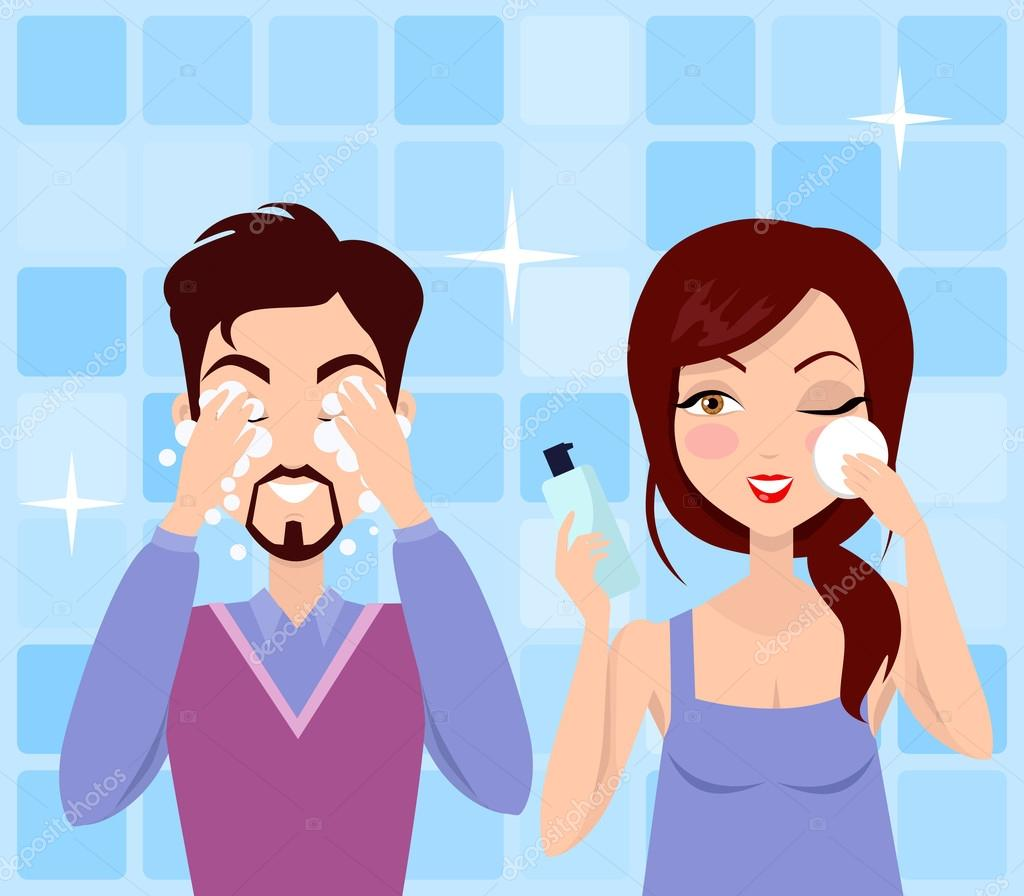

# Proyek Overview





Skincare sudah menjadi kebutuhan pokok sama halnya dengan
sandang , pangan, dan papan [[1]](https://jurnal.umsu.ac.id/index.php/MANEGGIO/article/view/17785). Skincare merupakan produk perawatan kulit yang berfungsi untuk membantu menjaga kulit supaya tetap sehat dan terawat serta melindungi   dari   radikal   bebas   yang   akan   menyebabkan   rusaknya   lapisan epidermis  kulit [[2]](https://www.jurnal.politeknik-kebumen.ac.id/E-Bis/article/view/668/305). Keanekaragaman  produk  dan  manfaatnya  yang  beragam  terus  dikembangkan oleh pelaku usaha skincare dari segi kualitas produk dan harga untuk menarik lebih banyak konsumen [[3]](https://journal.stieamkop.ac.id/index.php/yume/article/view/1545/992). Adapun faktor lain yang harus diperhatikan karena dapat mempengaruhi keputusan konsumen, yaitu ulasan konsumen online dan penilaian konsumen online, keduanya dapat meningkatkan kepercayaan konsumen [[3]](https://journal.stieamkop.ac.id/index.php/yume/article/view/1545/992). Salah satu masalah dalam membeli produk perawatan kulit secara online adalah pengguna tidak dapat mencoba produk tersebut dan bergantung pada ulasan penilaian pelanggan lain. Namun, ulasan penilaian pada skala 1 hingga 5 dianggap tidak cukup untuk mewakili kualitas produk, dan pengguna perlu membaca teks ulasan yang ditulis oleh pengguna lain untuk mendapatkan informasi yang lebih spesifik tentang kualitas produk [[4]](https://ieeexplore.ieee.org/abstract/document/10037471). customer  atau pengguna yang  masih  awam  dalam  dunia skincaremasih mengalami  kesulitan dalami mengkatagorikan  produk,  misalnya  mereka  kurang  mengetahui mana toner dan serum. Oleh karena itu diperlukan sebuah sistem yang dapat merekomendasikan produk skincare [[5]](https://ejournal.umm.ac.id/index.php/repositor/article/view/32284/14105).

Sistem rekomendasi telah menjadi bagian yang tak terpisahkan dari hampir semua
sistem berbasis informasi serta e-commerce pada umumnya digunakan agar tepat pemberian saran pelanggan kepada pelanggan. Algoritma dan kecerdasan buatan atau Artificial Intelligence (AI) kini digunakan untuk membuat rekomendasi skincare personal, mendeteksi kebutuhan skincare, menghasilkan produk skincare. Oleh karena itu, penulis ingin mengembangkan sistem rekomendasi skincare dengan 2 approach, yaitu content-based approach dan collaborative approach untuk memberikan sistem rekomendasi terbaik untuk pengguna. Hal ini penting agar pengguna dapat mendapatkan skincare rekomendasi terbaik untuk mereka serta juga penting bagi brand agar mereka mampu terus berkembang untuk memberikan produk terbaik bagi konsumennya.

# Business Understanding

## Problem Statements


## Problem Statements

1. bagaimana pesebaran penggunaan skincare berdssarkan gender dan produk yang bebas cruelty free?

2. bagaimana performa brand dan product berdasatkan rating?

3. bagaimana efektivitas bahan dan performa produk menangani berbagai macam tipe kulit berdasarkan rating?

4. Bagaimana cara membuat sistem rekomendasi terbaik yang dapat diimplementasikan?

## Goals

1. Mengetahui pesebaran penggunaan skincare berdssarkan gender dan produk yang bebas cruelty free

2. Mengetahui performa brand dan product berdasatkan rating dengan menggunakan teknik visualisasi.

3. membuat visualisasi heatmap dan grafik untuk efektivitas bahan dan performa produk menangani berbagai macam tipe kulit berdasarkan rating.

4. Menggunakan algoritma cosine similarity maupun pemodelan machine learning untuk membuat sistem rekomendasi, lalu mengevaluasi menggunakan untuk menjamin keakuratan sistem rekomendasi.

## Solution Approach

1. Mengimplementasikan Exploratory Data Analysis (EDA) untuk analisis dan visualisasi data.
2. Mengimplementasikan content-based filtering approach menggunakan algoritma cosine similarity.
3. Mengimplementasikan collaborative-based filtering approach menggunakan algoritma deep learning.

# Data Understanding

## Mengimport Library

mengimport library yang diperlukan

In [ ]:
!pip install kaggle

In [ ]:
!pip install keras

In [3]:
import os
import shutil
import zipfile
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## Data Loading

In [ ]:
# Import module yang disediakan google colab untuk kebutuhan upload file credentials
from google.colab import files
files.upload()

In [5]:
# Create the .kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the kaggle.json file to the .kaggle directory
shutil.move('kaggle (2).json', '/root/.kaggle/kaggle (2).json')

# Set the file permissions
os.chmod('/root/.kaggle/kaggle (2).json', 600)

In [6]:
!kaggle datasets download -d waqi786/most-used-beauty-cosmetics-products-in-the-world

# List files in the current directory
os.listdir()

Dataset URL: https://www.kaggle.com/datasets/waqi786/most-used-beauty-cosmetics-products-in-the-world
License(s): apache-2.0
  0% 0.00/315k [00:00<?, ?B/s]
100% 315k/315k [00:00<00:00, 18.8MB/s]


['.config',
 'most-used-beauty-cosmetics-products-in-the-world.zip',
 'sample_data']

Selanjutnya, kita melihat 5 baris pertama dari data dengan `.head()` dan ukuran dari data dengan `.shape`.

In [7]:
#membuka zip menjadi folder
with zipfile.ZipFile("most-used-beauty-cosmetics-products-in-the-world.zip", "r") as zip_ref:
    zip_ref.extractall("dataset-folder")


#membaca csv dalam folder
data = pd.read_csv("/content/dataset-folder/most_used_beauty_cosmetics_products_extended.csv")

# Display the first few rows
data.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


### Deskripsi Variabel

berikut adalah arti dari variabel-variabel pada data tersebut.

Variabel | Keterangan
----------|----------
product_name | nama produk skincare
brand | nama brand dari produk skincare
category | Jenis produk skincare (serum, highlighter, mascara, faceoil,facemask)
usage_frequency | frekuensi penggunaan produk (daily, weekly, monthly, occasional)
Rating | Nilai produk dari skala 1.0-5.0
price_USD | Harga produk skincare
Number of reviews | jumlah ulasan produk skincare
product size | isi dari skincare dari 50mL sampai 250mL
Gender Target | Target dari produk skincare
skin type | jenis kulit (oily, normal, dry, combination, senstive)
packaging type | bentuk packaging skincare (tube, compact, spray, stick, bottle, jar)
main ingredients| bahan kandungan skincare seperti vitamin c, retinol
cruelty free | skincare yang diujicobakan pada hewan
country of origin | asal product skincare

#### menampilkan Type Variabel

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [ ]:
# Menampilkan jumlah baris dan kolom pada data
total_row, total_column = data.shape
print(f"Total of rows: {total_row}")
print(f"Total of column: {total_column}")

Total of rows: 15000
Total of column: 14


Dapat dilihat bahwa data yang digunakan adalah sebanyak 15000 data dengan 14 fitur dengan terdapat 2 variabel bertipe `float64`, 10 variabel bertipe `object`, 1 variabel bertipe `bool` dan 1 variabel bertipe `int64`.

#### Statistik Deskripsi dari Data

In [ ]:
data.describe()

,Price_USD,Rating,Number_of_Reviews
count,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333
std,40.402983,1.168029,2855.665464
min,10.000000,1.000000,52.000000
25%,45.480000,2.000000,2562.000000
50%,80.040000,3.000000,5002.000000
75%,114.760000,4.000000,7497.000000
max,149.990000,5.000000,10000.000000


Table diatas memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval - dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.

dari tabel diatas disimpulkan bahwa:
- pada kolom `price_usd` menunjukkan bahwa harga produk skincare dengan harga paling murah 10 dollar dan paling mahal 149.9 dollar dengan rata2 keseluruhan harga produk skincare 80 dollar.
- pada kolom `rating` menunjukkan bahwa pengguna menggunakan produk memberikan rating kurang baik dengan nilai 1.0 dan memberikan sangat baik 5.0 serta rata-rata produk skincare diberikan nilai 3.0.
- pada kolom `number_of_reviews` menunjukkan bahwa review produk skincare pada suatu produk paling sedikit sebanyak 52 review dan paling banyak pada suatu produk 10000 review serta rata-rata produk skincare direview pengguna produk skincare sebanyak 5014 reviews.

### Data Cleaning

#### memeriksa data duplikasi

In [ ]:
# Menampilkan data duplikat
data[data.duplicated]

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin


tidak ada data yang duplikasi

#### memeriksa missing value

In [ ]:
# Menjumlahkan nilai null yang ada pada data
pd.DataFrame({'Nilai yang Kosong':data.isnull().sum()})

,Nilai yang Kosong
Product_Name,0
Brand,0
Category,0
Usage_Frequency,0
Price_USD,0
Rating,0
Number_of_Reviews,0
Product_Size,0
Skin_Type,0
Gender_Target,0


tidak ada data yang missing value

# Exploratory Data  Analysis (EDA)

## Gender Target

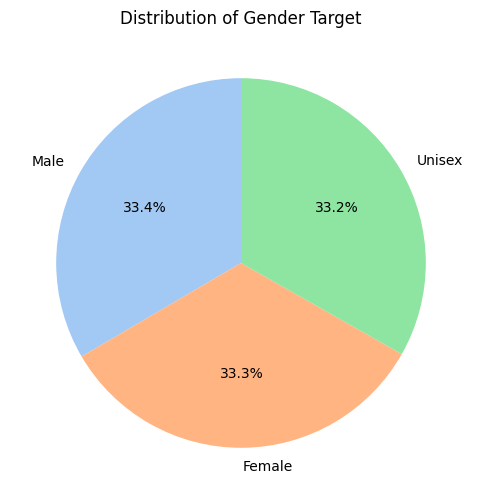

In [ ]:
GenderTaget_Values = data['Gender_Target'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(GenderTaget_Values,labels = GenderTaget_Values.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Gender Target')
plt.show()

penjelasan:

berdasarkan diagram diatas dijelaskan bahwa perusahaan skincare membuat produk untuk segmen pertama pada konsumen pria dengan angka 33.4%, segmen kedua pada produk untuk segmen kedua pada perempuan dengan angka 33.3%, dan segmen ketiga pada unisex 33.2%. Hal ini karena pria sudah mulai sadar pentingnya penggunaan skincare dan memiliki peluang yang baik dan masi sedikit produk skincare untuk pria dibandingkan skincare perempuan.

## Brand Cruelty Free

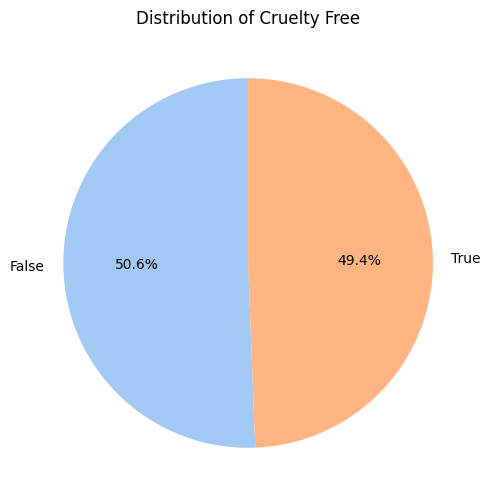

In [ ]:
GenderTarget_Values = data['Cruelty_Free'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(GenderTarget_Values,labels = GenderTarget_Values.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Cruelty Free')
plt.show()

penjelasan:

berdasarkan gambar diatas diketahui bahwa masih banyak produk skincare yang mengujicoba produk skincare ke sebesar sebesar 50.6%, sedangkan produk skincare yang sudah beralih dari penggunaan media hewan untuk pengujicoba produk dengan kultur sel manusia atau jaringan manusia.

## Effectiveness of Ingredients on Skin type based on Rating Score

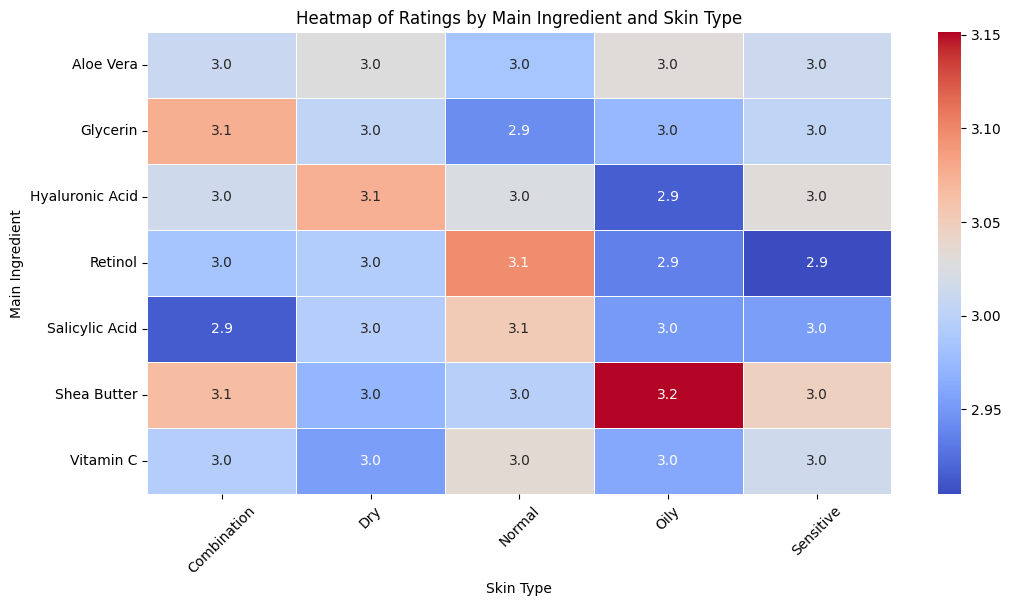

In [ ]:
# Pivot table
effect = data.pivot_table(index='Main_Ingredient', columns='Skin_Type', values='Rating', aggfunc='mean')

# Heatmap figure
plt.figure(figsize=(12, 6))
sns.heatmap(effect, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Heatmap of Ratings by Main Ingredient and Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Main Ingredient')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

penjelasan:

berasarkan heatmap diatas disimpulkan bahwa:
1. kulit bertipe `kering` menggunakan skincare umumnya mengandung bahan hylaronic acid.
2. kulit bertipe `normal` menggunakan skincare umumnya mengandung bahan retinol dan salicylic acid.
3. kulit bertipe `kombinasi` menggunakan skincare umumnya mengandung bahan glycerin dan shea butter.
4. kulit bertipe `oily` menggunakan skincare umumnya mengandung shea butter.
5. kulit bertipe `sensitive` menggunakan skincare umumnya jarang mengandung retinol.


## Avarage Rating and Number of Reviews by Skin Type

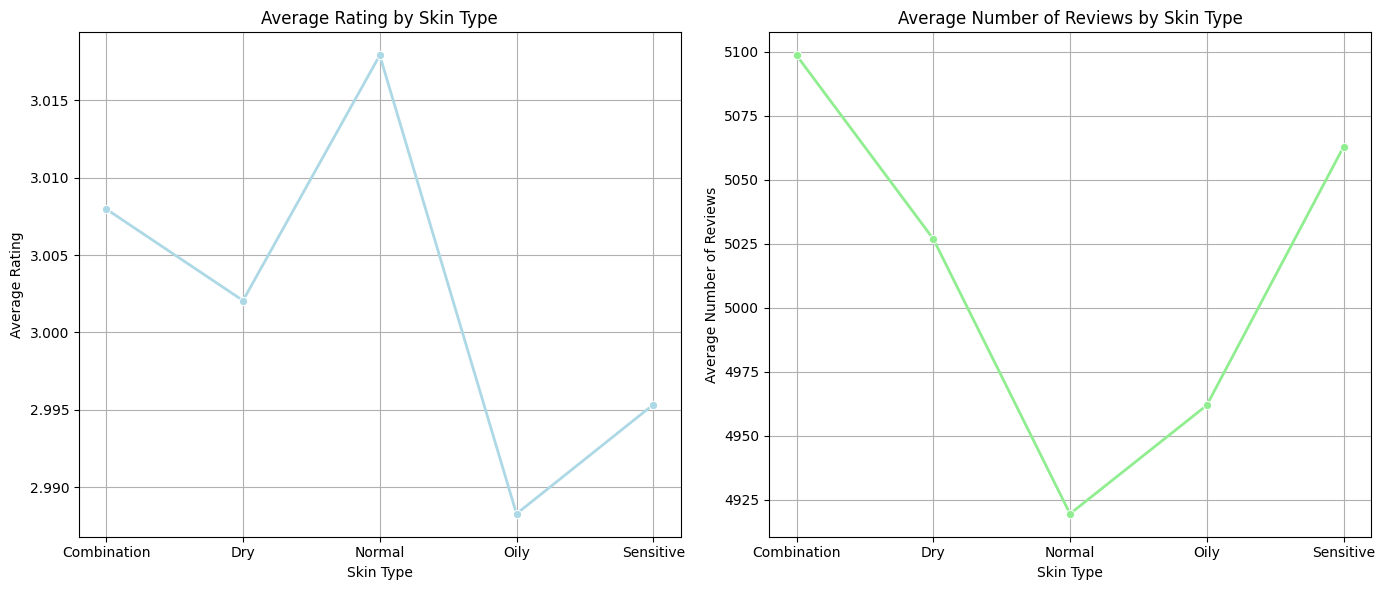

In [12]:
# Calculate the average rating per skin type
Skin_Type_Satisfaction_Rating = data.groupby(by='Skin_Type')['Rating'].mean().reset_index()
Skin_Type_Satisfaction_Reviews = data.groupby(by='Skin_Type')['Number_of_Reviews'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot the first line chart
sns.lineplot(
    data=Skin_Type_Satisfaction_Rating,
    x='Skin_Type',
    y='Rating',
    marker='o',
    color='lightblue',
    linewidth=2.0,
    ax=axes[0]
)
axes[0].set_title('Average Rating by Skin Type')
axes[0].set_xlabel('Skin Type')
axes[0].set_ylabel('Average Rating')
axes[0].grid(True)

# Plot the second line chart
sns.lineplot(
    data=Skin_Type_Satisfaction_Reviews,
    x='Skin_Type',
    y='Number_of_Reviews',
    marker='o',
    color='lightgreen',
    linewidth=2.0,
    ax=axes[1]
)
axes[1].set_title('Average Number of Reviews by Skin Type')
axes[1].set_xlabel('Skin Type')
axes[1].set_ylabel('Average Number of Reviews')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


penjelasan:

berdasarkan grafik diatas bahwa pengguna tipe kulit normal menggunakan produk skincare rata-rata memberikan rating baik diatas 3.5 keatas ,sedangkan untuk kulit tipe oily dan tipe sensitif rata-rata memberikan rating dibawah 3.0. Grafik menunjukkan bahwa kulit tipe combination, oily, dan sensitive memiliki kepedulian terhadap kesehatan kulit dilihat dari rata-rata jumlah reviews.

Dengan demikian, perusahaan skincare harus saat mengkampayekan dan edukasi produknya mengenai bahan kandungan yang harus sesuai dengan segmen sesuai tipe kulitnya karena kulit tipe combinatian,tipe kulit oily, dan kulit sensitive memiliki potensial menjadi pelanggan yang loyal dilihat dari grafik jumlah reviews jika diberikan produk skincare yang tepat karena dari rating tipe kulit oily dan tipe sensitive rata-rata memberikan rating rendah yang bermakna produk yang dibelinya kurang tepat.

## Product by Country

<ipython-input-14-925e1cb60187>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


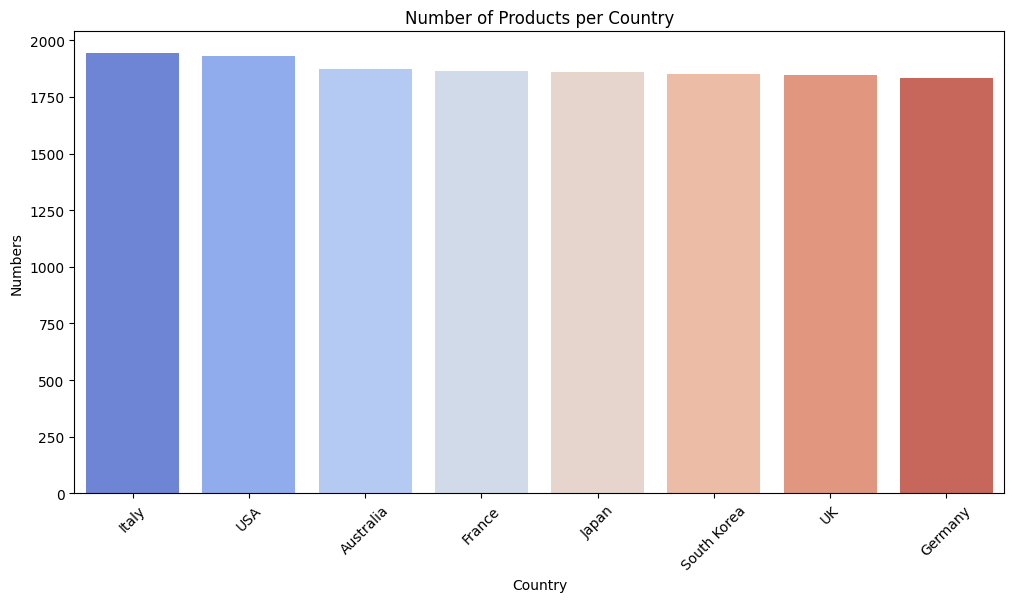

In [14]:
# Sort the data by the count of 'Country_of_Origin'
country_order = data['Country_of_Origin'].value_counts(ascending=False).index

# Plot the countplot with sorted order
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Country_of_Origin',
    data=data,
    palette='coolwarm',
    order=country_order
)

# Add plot details
plt.title('Number of Products per Country')
plt.xlabel('Country')
plt.ylabel('Numbers')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

penjelasan:

beradasarkan plot diatas dapat disimpulkan bahwa negara yang memproduksi skincare terbanyak pada negara italia, USA, dan Australia yang bermakna banyak brand produk skincare memiliki banyak jenis produk skincare karena memiliki empat musim.

## Brand and Product Based on Rating

<ipython-input-19-ba71125afba7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-19-ba71125afba7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


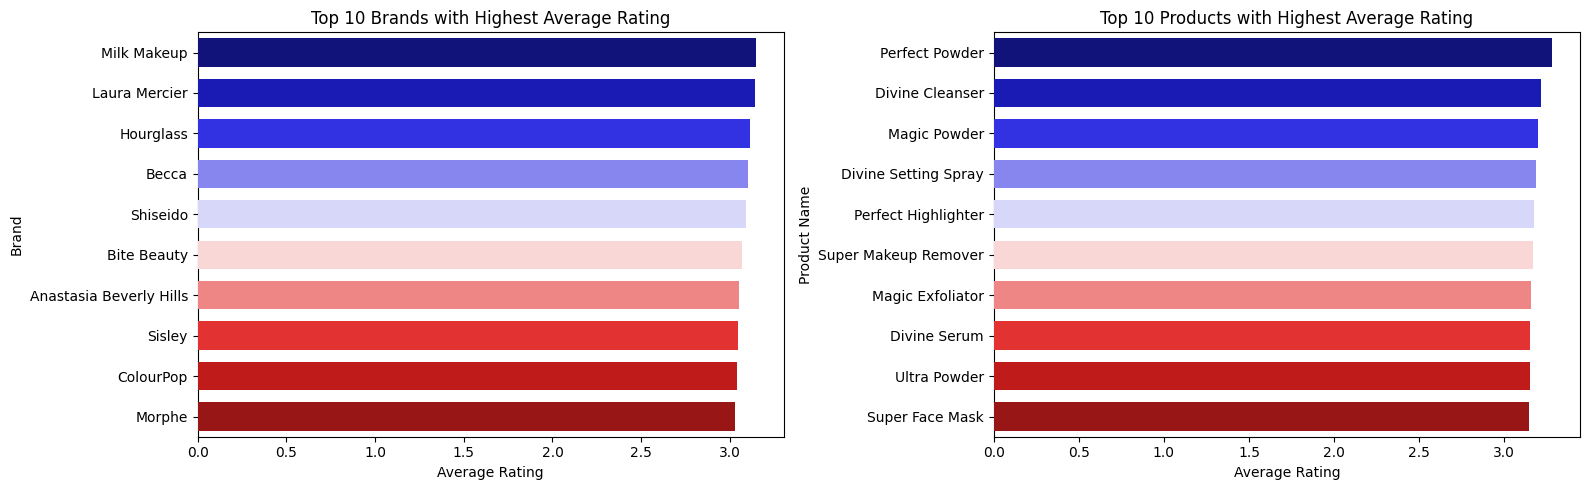

In [19]:
# Calculate average ratings by Brand
average_rating_by_Brand = data.groupby("Brand")["Rating"].mean().reset_index()
top10_popular_brand = average_rating_by_Brand.nlargest(10, "Rating")

# Calculate average ratings by Product_Name
average_rating_by_Product = data.groupby("Product_Name")["Rating"].mean().reset_index()
top10_popular_product = average_rating_by_Product.nlargest(10, "Rating")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=False)

# Plot for Top 10 Brands
sns.barplot(
    x="Rating",
    y="Brand",
    data=top10_popular_brand,
    palette="seismic",
    zorder=3,
    width=0.7,
    ax=axes[0]
)
axes[0].set_title("Top 10 Brands with Highest Average Rating")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Brand")

# Plot for Top 10 Products
sns.barplot(
    x="Rating",
    y="Product_Name",
    data=top10_popular_product,
    palette="seismic",
    zorder=3,
    width=0.7,
    ax=axes[1]
)
axes[1].set_title("Top 10 Products with Highest Average Rating")
axes[1].set_xlabel("Average Rating")
axes[1].set_ylabel("Product Name")

# Adjust layout
plt.tight_layout()
plt.show()

penjelasan:

berdasarkan plot diata dijelaskan bahwa brand memiliki reputasi yang baik ditandai dengan rating diatas rata-rata:
1. Milk Makeup yang terkenal terbuat dari bahan 100% vegan,
2. Laura Mercier.
3. Hourglass yang merupakan 100% vergan.

tiga produk yang memiliki memiliki reputasi yang baik:
1. Perfect Powder
2. Divine Cleanser
3. Magic Powder

disimpulkan bahwa brand dengan reputasi baik oleh produk skincare 100% vegan ,sedangkan produk skincare yang paling disukai oleh responden yaitu powder.

# Modeling

## Content Based Filtering

### A. Data Preparation

Untuk content-based filtering, kita akan fokus pada product_name, brand beserta category,skin,ingredient yang sudah disatukan untuk menjadi dasar pembuatan sistem rekomendasi tersebut. Oleh karena itu, dataframe hanya terdiri 4 kolom dari data yang dimiliki.

In [ ]:
# membuat data dengan mendrop kolom yang tidak diperlukan dan akan digabung
dataset_content = data.drop(columns=[ 'Usage_Frequency', 'Price_USD',
       'Rating', 'Number_of_Reviews', 'Product_Size', 'Skin_Type',
       'Gender_Target', 'Packaging_Type', 'Main_Ingredient', 'Cruelty_Free',
       'Country_of_Origin', "Category"])

# membuat kolom kriteria dasar rekomendasi dalam satu kolom dari kolom skin_type, category, dan main ingredient
dataset_content["brand_product"] = data["Brand"].astype(str) + "-" + data["Product_Name"].astype(str) + " (" + data['Category'].astype(str) +")"
dataset_content["category_ingredient_skin"] = data["Category"].astype(str)+ ", " + data["Main_Ingredient"].astype(str)+ ", " + data['Skin_Type']

#menampilkan dataset 5 teratas
dataset_content.head()

,Product_Name,Brand,brand_product,category_ingredient_skin
0,Ultra Face Mask,Drunk Elephant,Drunk Elephant-Ultra Face Mask (Blush),"Blush, Retinol, Sensitive"
1,Ultra Lipstick,Laura Mercier,Laura Mercier-Ultra Lipstick (Makeup Remover),"Makeup Remover, Shea Butter, Dry"
2,Ultra Serum,Natasha Denona,Natasha Denona-Ultra Serum (Highlighter),"Highlighter, Aloe Vera, Sensitive"
3,Divine Serum,Ilia Beauty,Ilia Beauty-Divine Serum (Face Mask),"Face Mask, Glycerin, Normal"
4,Super Foundation,Charlotte Tilbury,Charlotte Tilbury-Super Foundation (Highlighter),"Highlighter, Glycerin, Oily"


In [ ]:
# Mengonversi data series "Product_Name" menjadi dalam bentuk list
Product_Name = dataset_content["Product_Name"].tolist()

# Mengonversi data series "Brand" menjadi dalam bentuk list
Brand = dataset_content["Brand"].tolist()

# Mengonversi data series "category, ingredient, skin" menjadi dalam bentuk list
category_ingredient_skin = dataset_content["category_ingredient_skin"].tolist()

# Mengonversi data series "brand_product" menjadi dalam bentuk list
brand_product = dataset_content["brand_product"].tolist()

# Menampilkan banyak data dari masing-masing list
print(f" terdapat {len(Product_Name)} data product name")
print(f" terdapat {len(Brand)} data brand")
print(f" terdapat {len(category_ingredient_skin)} data category,skin,ingredient")
print(f" terdapat {len(brand_product)} data brand_product")

 terdapat 15000 data product name
 terdapat 15000 data brand
 terdapat 15000 data category,skin,ingredient
 terdapat 15000 data brand_product


Selanjutnya, kita akan membuat dictionary dari keempat kolom tersebut.

In [ ]:
# Membuat dictionary untuk data
content_based_data = pd.DataFrame({
    "Product_Name": Product_Name,
    "Brand": Brand,
    "brand_product": brand_product,
    "category_ingredient": category_ingredient_skin
})
content_based_data.head()

,Product_Name,Brand,brand_product,category_ingredient
0,Ultra Face Mask,Drunk Elephant,Drunk Elephant-Ultra Face Mask (Blush),"Blush, Retinol, Sensitive"
1,Ultra Lipstick,Laura Mercier,Laura Mercier-Ultra Lipstick (Makeup Remover),"Makeup Remover, Shea Butter, Dry"
2,Ultra Serum,Natasha Denona,Natasha Denona-Ultra Serum (Highlighter),"Highlighter, Aloe Vera, Sensitive"
3,Divine Serum,Ilia Beauty,Ilia Beauty-Divine Serum (Face Mask),"Face Mask, Glycerin, Normal"
4,Super Foundation,Charlotte Tilbury,Charlotte Tilbury-Super Foundation (Highlighter),"Highlighter, Glycerin, Oily"


In [ ]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data category_ingredient_skin
tf.fit(content_based_data["category_ingredient"])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['acid', 'aloe', 'bb', 'blush', 'bronzer', 'butter', 'cc',
       'cleanser', 'combination', 'concealer', 'contour', 'cream', 'dry',
       'exfoliator', 'eye', 'eyeliner', 'face', 'foundation', 'gloss',
       'glycerin', 'highlighter', 'hyaluronic', 'liner', 'lip',
       'lipstick', 'makeup', 'mascara', 'mask', 'moisturizer', 'normal',
       'oil', 'oily', 'powder', 'primer', 'remover', 'retinol',
       'salicylic', 'sensitive', 'serum', 'setting', 'shadow', 'shea',
       'spray', 'vera', 'vitamin'], dtype=object)

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(content_based_data["category_ingredient"])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(15000, 45)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.46062789, 0.        , ..., 0.        , 0.46062789,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.45659646, 0.        , ..., 0.        , 0.45659646,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

Setelah dibentuk matriks, dibuat tabel berisi nama product beserta category,ingredient,skin type berdasarkan TF-IDF yang telah diinisiasi.

In [ ]:
# Membentuk tabel dari nama brand_product beserta kolom yang berisi  category,ingredient,skin type berdasarkan tfidf
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tf.get_feature_names_out(),
    index = content_based_data.brand_product
)

,acid,aloe,bb,blush,bronzer,butter,cc,cleanser,combination,concealer,...,retinol,salicylic,sensitive,serum,setting,shadow,shea,spray,vera,vitamin
brand_product,,,,,,,,,,,,,,,,,,,,,
Drunk Elephant-Ultra Face Mask (Blush),0.000000,0.000000,0.0,0.728084,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.511075,0.000000,0.456832,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Laura Mercier-Ultra Lipstick (Makeup Remover),0.000000,0.000000,0.0,0.000000,0.0,0.383847,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.383847,0.0,0.000000,0.0
Natasha Denona-Ultra Serum (Highlighter),0.000000,0.460628,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.405964,0.000000,0.0,0.0,0.000000,0.0,0.460628,0.0
Ilia Beauty-Divine Serum (Face Mask),0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Charlotte Tilbury-Super Foundation (Highlighter),0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patrick Ta-Magic Eyeliner (Face Mask),0.000000,0.406752,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.358482,0.000000,0.0,0.0,0.000000,0.0,0.406752,0.0
Farsali-Perfect Powder (Serum),0.371885,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.483455,0.000000,0.665253,0.0,0.0,0.000000,0.0,0.000000,0.0
Kiehl’s-Magic Serum (Highlighter),0.000000,0.000000,0.0,0.000000,0.0,0.459031,0.0,0.0,0.403859,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.459031,0.0,0.000000,0.0


### B. Modeling and Result

Untuk menentukan content-based filtering, pada proyek ini digunakan cosine similarity untuk mencari kemiripan produk dan brand.

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.18545736, ..., 0.        , 0.        ,
        0.47120463],
       [0.        , 1.        , 0.        , ..., 0.35239501, 0.13773029,
        0.35051453],
       [0.18545736, 0.        , 1.        , ..., 0.41315226, 0.42064213,
        0.        ],
       ...,
       [0.        , 0.35239501, 0.41315226, ..., 1.        , 0.        ,
        0.41916922],
       [0.        , 0.13773029, 0.42064213, ..., 0.        , 1.        ,
        0.        ],
       [0.47120463, 0.35051453, 0.        , ..., 0.41916922, 0.        ,
        1.        ]])

Setelah itu, akan dibuat tabel berisi cosine similarity produk skincare.

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa brand dan product
cosine_sim_df = pd.DataFrame(cosine_sim, index = dataset_content["brand_product"], columns = dataset_content['brand_product'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap produk
cosine_sim_df.sample(5, axis = 1).sample(15, axis = 0)

Shape: (15000, 15000)


brand_product,Too Faced-Ultra Concealer (Exfoliator),Kiehl’s-Divine Eyeliner (Face Oil),Perricone MD-Ultra Concealer (Makeup Remover),Laura Mercier-Perfect Contour (Serum),Bite Beauty-Perfect Face Oil (Serum)
brand_product,,,,,
Pat McGrath Labs-Perfect Exfoliator (Makeup Remover),0.000000,0.000000,0.764166,0.000000,0.000000
Tarte-Super Contour (Face Oil),0.000000,0.871035,0.000000,0.000000,0.000000
Hourglass-Divine BB Cream (Contour),0.258170,0.000000,0.154044,0.000000,0.000000
Make Up For Ever-Perfect Eye Shadow (Blush),0.000000,0.000000,0.000000,0.266747,0.000000
Milk Makeup-Ultra Lip Gloss (Serum),0.193971,0.153990,0.000000,0.676613,1.000000
Juvia’s Place-Divine Mascara (Lipstick),0.000000,0.000000,0.000000,0.000000,0.136363
Urban Decay-Divine Blush (Foundation),0.205284,0.162971,0.000000,0.475882,0.195161
Kiehl’s-Perfect Eyeliner (Mascara),0.000000,0.000000,0.000000,0.268548,0.000000
E.l.f.-Ultra Bronzer (Lip Gloss),0.000000,0.000000,0.000000,0.000000,0.000000


Setelah dibentuk tabel cosine similarity, selanjutnya akan dibuat fungsi untuk menentukan rekomendasi skincare berdasarkan content-based filtering.

### C. Testing System Recommendation

In [ ]:
def content_based_skincare_recommendations(nama_skincare, similarity_data = cosine_sim_df,
                                        items = content_based_data, k = 10):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy Range(start, stop, step)
    index = similarity_data.loc[:, nama_skincare].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1 : -(k + 2) : -1].flatten()]

    # Drop nama_product agar nama skincare yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_skincare, errors = "ignore")

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
# Menampilkan baris sesuai nama brand-nsma produk (category) yang ditulis
data[data.brand_product.eq('Ilia Beauty-Perfect Powder (Concealer)')]

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin,brand_product,category_ingredient_skin
4562,Perfect Powder,Ilia Beauty,Concealer,Weekly,16.85,1.8,7314,100ml,Sensitive,Unisex,Jar,Aloe Vera,True,Germany,Ilia Beauty-Perfect Powder (Concealer),"Concealer, Aloe Vera, Sensitive"


In [ ]:
# Menampilkan rekomendasi skincare berdasarkaan type kulit, category, dan ingredient
content_based_skincare_recommendations('Ilia Beauty-Perfect Powder (Concealer)')

,brand_product,Product_Name,Brand,category_ingredient
0,Urban Decay-Super Serum (Concealer),Super Serum,Urban Decay,"Concealer, Aloe Vera, Sensitive"
1,Danessa Myricks-Divine Makeup Remover (Concealer),Divine Makeup Remover,Danessa Myricks,"Concealer, Aloe Vera, Sensitive"
2,Tarte-Divine Primer (Concealer),Divine Primer,Tarte,"Concealer, Aloe Vera, Sensitive"
3,Tarte-Divine Primer (Concealer),Divine Primer,Tarte,"Concealer, Vitamin C, Oily"
4,Patrick Ta-Divine Highlighter (Concealer),Divine Highlighter,Patrick Ta,"Concealer, Aloe Vera, Sensitive"
5,Becca-Ultra Bronzer (Concealer),Ultra Bronzer,Becca,"Concealer, Aloe Vera, Sensitive"
6,E.l.f.-Divine Exfoliator (Concealer),Divine Exfoliator,E.l.f.,"Concealer, Aloe Vera, Sensitive"
7,Becca-Magic Powder (Concealer),Magic Powder,Becca,"Concealer, Aloe Vera, Sensitive"
8,Pat McGrath Labs-Super Highlighter (Concealer),Super Highlighter,Pat McGrath Labs,"Concealer, Aloe Vera, Sensitive"
9,Ilia Beauty-Ultra Lip Gloss (Concealer),Ultra Lip Gloss,Ilia Beauty,"Concealer, Aloe Vera, Sensitive"


penjelasan:

dari hasil rekomendasi berdasarkan category skincare, ingredient, dan jenis kulit berhasil memberikan rekomendasi sesuai sebanyak 9 rekomendasi dan tidak sesuai 1 rekomendasi.

## Collaborative-based Filtering

### A. Data Preparation

In [ ]:
# membuat data dengan mendrop kolom yang tidak diperlukan dan akan digabung
dataset_filter = data.drop(columns=[ 'Usage_Frequency', 'Price_USD', 'Number_of_Reviews', 'Product_Size',
                 'Skin_Type','Gender_Target', 'Packaging_Type', 'Main_Ingredient', 'Cruelty_Free','Country_of_Origin', "Category"])

# membuat kolom kriteria dasar rekomendasi dalam satu kolom dari kolom skin_type, category, dan main ingredient
dataset_filter["brand_product"] = data["Brand"].astype(str) + "-" + data["Product_Name"].astype(str) + " (" + data['Category'].astype(str) +")"
dataset_filter["category_ingredient_skin"] = data["Category"].astype(str)+ ", " + data["Main_Ingredient"].astype(str)+ ", " + data['Skin_Type']

#menampilkan dataset 5 teratas
dataset_filter.head()

,Product_Name,Brand,Rating,brand_product,category_ingredient_skin
0,Ultra Face Mask,Drunk Elephant,1.4,Drunk Elephant-Ultra Face Mask (Blush),"Blush, Retinol, Sensitive"
1,Ultra Lipstick,Laura Mercier,4.2,Laura Mercier-Ultra Lipstick (Makeup Remover),"Makeup Remover, Shea Butter, Dry"
2,Ultra Serum,Natasha Denona,1.6,Natasha Denona-Ultra Serum (Highlighter),"Highlighter, Aloe Vera, Sensitive"
3,Divine Serum,Ilia Beauty,3.2,Ilia Beauty-Divine Serum (Face Mask),"Face Mask, Glycerin, Normal"
4,Super Foundation,Charlotte Tilbury,1.7,Charlotte Tilbury-Super Foundation (Highlighter),"Highlighter, Glycerin, Oily"


In [ ]:
# Create the "product_id" column
dataset_filter['product_id'] = dataset_filter['Product_Name'].apply(lambda x: x.split()[0][:3].upper()) + data.index.astype(str)
dataset_filter.head()

,Product_Name,Brand,Rating,brand_product,category_ingredient_skin,product_id
0,Ultra Face Mask,Drunk Elephant,1.4,Drunk Elephant-Ultra Face Mask (Blush),"Blush, Retinol, Sensitive",ULT0
1,Ultra Lipstick,Laura Mercier,4.2,Laura Mercier-Ultra Lipstick (Makeup Remover),"Makeup Remover, Shea Butter, Dry",ULT1
2,Ultra Serum,Natasha Denona,1.6,Natasha Denona-Ultra Serum (Highlighter),"Highlighter, Aloe Vera, Sensitive",ULT2
3,Divine Serum,Ilia Beauty,3.2,Ilia Beauty-Divine Serum (Face Mask),"Face Mask, Glycerin, Normal",DIV3
4,Super Foundation,Charlotte Tilbury,1.7,Charlotte Tilbury-Super Foundation (Highlighter),"Highlighter, Glycerin, Oily",SUP4


penjelasan:

Kolom `product_id` dibuat untuk tiap produk dengan mengambil tiga huruf depan produk dan index dari produk tersebut.

In [ ]:
# Mengubah product_id menjadi list tanpa nilai yang sama
track_ids = dataset_filter["product_id"].unique().tolist()
print("list track_id: ", track_ids)

# Melakukan encoding terhadap track_id
track_to_track_encoded = {x: i for i, x in enumerate(track_ids)}
print("encoded track_id : ", track_to_track_encoded)

# Melakukan proses encoding angka ke track_id
track_encoded_to_track = {i: x for i, x in enumerate(track_ids)}
print("encoded angka ke track_id: ", track_encoded_to_track)

list track_id:  ['ULT0', 'ULT1', 'ULT2', 'DIV3', 'SUP4', 'SUP5', 'SUP6', 'ULT7', 'MAG8', 'PER9', 'ULT10', 'DIV11', 'ULT12', 'DIV13', 'DIV14', 'PER15', 'PER16', 'SUP17', 'ULT18', 'DIV19', 'PER20', 'DIV21', 'DIV22', 'PER23', 'SUP24', 'DIV25', 'MAG26', 'ULT27', 'MAG28', 'SUP29', 'PER30', 'MAG31', 'SUP32', 'ULT33', 'SUP34', 'SUP35', 'DIV36', 'SUP37', 'PER38', 'DIV39', 'SUP40', 'MAG41', 'PER42', 'PER43', 'DIV44', 'PER45', 'ULT46', 'MAG47', 'MAG48', 'DIV49', 'SUP50', 'PER51', 'SUP52', 'ULT53', 'ULT54', 'PER55', 'DIV56', 'DIV57', 'SUP58', 'SUP59', 'MAG60', 'PER61', 'ULT62', 'ULT63', 'MAG64', 'MAG65', 'SUP66', 'ULT67', 'SUP68', 'PER69', 'MAG70', 'DIV71', 'SUP72', 'MAG73', 'DIV74', 'ULT75', 'DIV76', 'DIV77', 'ULT78', 'PER79', 'SUP80', 'MAG81', 'ULT82', 'PER83', 'PER84', 'MAG85', 'DIV86', 'DIV87', 'SUP88', 'DIV89', 'ULT90', 'DIV91', 'DIV92', 'SUP93', 'DIV94', 'PER95', 'DIV96', 'MAG97', 'SUP98', 'MAG99', 'DIV100', 'MAG101', 'ULT102', 'MAG103', 'DIV104', 'SUP105', 'DIV106', 'SUP107', 'SUP108', 'UL

In [ ]:
# Mengubah product_brand menjadi list tanpa nilai yang sama
track_name = dataset_filter["brand_product"].unique().tolist()
print(track_name)

# Melakukan encoding terhadap product_brand
name_to_name_encoded = {x: i for i, x in enumerate(track_name)}
print("encoded track_id : ", name_to_name_encoded)

# Melakukan proses encoding angka ke product_brand
name_encoded_to_name = {i: x for i, x in enumerate(track_name)}
print("encoded track_id : ", name_encoded_to_name)

['Drunk Elephant-Ultra Face Mask (Blush)', 'Laura Mercier-Ultra Lipstick (Makeup Remover)', 'Natasha Denona-Ultra Serum (Highlighter)', 'Ilia Beauty-Divine Serum (Face Mask)', 'Charlotte Tilbury-Super Foundation (Highlighter)', 'Danessa Myricks-Super Eye Shadow (Foundation)', 'Bourjois-Super Lip Gloss (Powder)', 'Bourjois-Ultra Cleanser (Lip Gloss)', 'IT Cosmetics-Magic Highlighter (CC Cream)', 'Fenty Beauty-Perfect Bronzer (Face Mask)', 'Sisley-Ultra Moisturizer (Powder)', 'Juvia’s Place-Divine CC Cream (Eye Shadow)', 'NARS-Ultra Setting Spray (Concealer)', 'ColourPop-Divine Primer (Eyeliner)', 'Huda Beauty-Divine Exfoliator (Lipstick)', 'Tatcha-Perfect Blush (Setting Spray)', 'Kiehl’s-Perfect Highlighter (Cleanser)', 'Huda Beauty-Super Cleanser (Bronzer)', 'Tarte-Ultra Face Oil (Primer)', 'Glossier-Divine Lip Gloss (Face Oil)', 'Make Up For Ever-Perfect Blush (Contour)', 'Anastasia Beverly Hills-Divine Foundation (Mascara)', 'Fenty Beauty-Divine Cleanser (Face Mask)', 'E.l.f.-Perfect

In [ ]:
# Mapping track_id ke dataframe track
dataset_filter["track"] = dataset_filter["product_id"].map(track_to_track_encoded)

# Mapping track_name ke dataframe name
dataset_filter["name"] = dataset_filter["brand_product"].map(name_to_name_encoded)

In [ ]:
# Mendapatkan jumlah track_id
num_track = len(track_to_track_encoded)
print(num_track)

# Mendapatkan jumlah track_name
num_name = len(name_encoded_to_name)
print(num_name)

# Mencari nilai minimum popularity
min_popularity = min(dataset_filter["Rating"])

# Mencari nilai maksimal popularity
max_popularity = max(dataset_filter["Rating"])

print("Number of Track ID: {}, Number of Track Name: {}, Min popularity: {}, Max popularity: {}".format(
    num_track, num_name, min_popularity, max_popularity
))

15000
14036
Number of Track ID: 15000, Number of Track Name: 14036, Min popularity: 1.0, Max popularity: 5.0


In [ ]:
# Mengacak dataset
collaborative_based = dataset_filter[["track", "name", "Rating"]].sample(frac = 1, random_state = 42)
collaborative_based

,track,name,Rating
11499,11499,6721,4.1
6475,6475,6282,1.8
13167,13167,12418,3.1
862,862,859,4.8
5970,5970,5810,4.2
...,...,...,...
5191,5191,5069,4.4
13418,13418,7812,2.3
5390,5390,5257,1.6
860,860,857,4.6


In [ ]:
# Membuat variabel x untuk mencocokkan data track dan nama menjadi satu value
x = collaborative_based[["track", "name"]].values

# Membuat variabel y untuk membuat popularity dari hasil
y = collaborative_based["Rating"].apply(lambda x: (x - min_popularity) / (max_popularity - min_popularity)).values

# Membagi data menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[11499  6721]
 [ 6475  6282]
 [13167 12418]
 ...
 [ 5390  5257]
 [  860   857]
 [ 7270  7027]] [0.775 0.2   0.525 ... 0.15  0.9   0.5  ]


### B. Modeling

In [ ]:
class RecommenderNet(tf.keras.Model):

    # Insialisasi fungsi
    def __init__(self, num_track, num_name, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_track = num_track
        self.num_name = num_name
        self.embedding_size = embedding_size

        # Membentuk layer embedding untuk track
        self.track_embedding = layers.Embedding(
            num_track,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )

        # Membentuk layer embedding untuk name
        self.name_embedding = layers.Embedding(
            num_name,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )

        # Membentuk layer embedding untuk name_bias dan track_bias
        self.name_bias = layers.Embedding(num_name, 1)
        self.track_bias = layers.Embedding(num_track, 1)

    def call(self, inputs):
        track_vector = self.track_embedding(inputs[:,0]) # memanggil layer embedding 1
        track_bias = self.track_bias(inputs[:, 0]) # memanggil layer embedding 2
        name_vector = self.name_embedding(inputs[:, 1]) # memanggil layer embedding 3
        name_bias = self.name_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_track_name = tf.tensordot(track_vector, name_vector, 2)

        x = dot_track_name + track_bias + name_bias

        # Menggunakan fungsi aktivasi sigmoid
        return tf.nn.sigmoid(x)

In [ ]:
# Inisialisasi model
model = RecommenderNet(num_track, num_name, 50)

# Model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.6935 - root_mean_squared_error: 0.2924 - val_loss: 0.6931 - val_root_mean_squared_error: 0.2918
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.6871 - root_mean_squared_error: 0.2867 - val_loss: 0.6934 - val_root_mean_squared_error: 0.2918
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.6808 - root_mean_squared_error: 0.2810 - val_loss: 0.6938 - val_root_mean_squared_error: 0.2919
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.6765 - root_mean_squared_error: 0.2751 - val_loss: 0.6941 - val_root_mean_squared_error: 0.2919
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - loss: 0.6775 - root_mean_squared_error: 0.2769 - val_loss: 0.6944 - val_root_mean_squared_error: 0.2919
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - loss: 0.6862 - root_mean_squared_error: 0.2847 - val_loss: 0.6947 - val_root_mean_squared_error: 0.2920
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7

### C. Testing System Recommendation

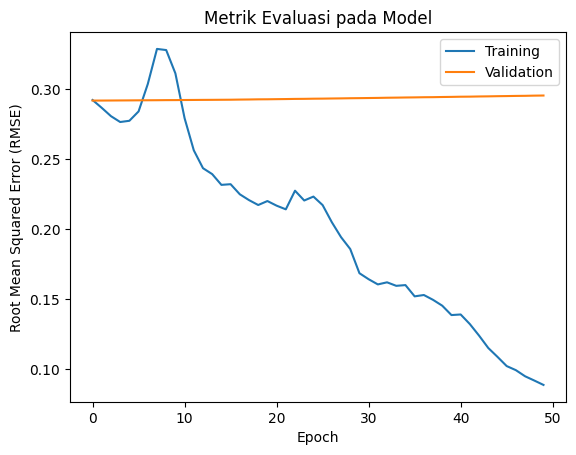

In [ ]:
# Membuat line plot untuk menunjukkan metrik evaluasi
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])

# Menambahkan judul, label, dan legend pada plot
plt.title("Metrik Evaluasi pada Model")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("Epoch")
plt.legend(["Training", "Validation"], loc = "upper right")

# Menampilkan plot
plt.show()

In [ ]:
def recommend_tracks_based_on_track_name(track_name, top_n = 10):
    # Memeriksa apakah nama track ada di dalam mapping nama
    if track_name not in name_to_name_encoded:
        print(f"Track dengan judul '{track_name}' tidak ditemukan.")
        return

    # Encoding nama track sesuai dengan nilai encodingnya
    track_name_encoded = name_to_name_encoded[track_name]

    # Membuat list seluruh ID track yang ada
    all_track_ids = list(track_to_track_encoded.values())

    # Mempersiapkan ID dan nama track untuk prediksi
    track_name_array = np.array([[track_name_encoded]] * len(all_track_ids))
    track_id_array = np.array(all_track_ids).reshape(-1, 1)

    # Membentuk array ID dan nama track untuk prediksi
    track_name_track_id_array = np.hstack((track_id_array, track_name_array))

    # Memprediksi rating berdasarkan nama track yang dipilih
    popularity = model.predict(track_name_track_id_array).flatten()

    # Mendapatkan Top-N rekomendasi
    top_popularity_indices = popularity.argsort()[-top_n:][::-1]
    recommended_encoded_track_ids = [all_track_ids[x] for x in top_popularity_indices]

    # Mapping ID track yang sudah di encoding ke dataset awal
    recommended_track_ids = [track_encoded_to_track.get(product_id) for product_id in recommended_encoded_track_ids]

    # Menampilkan Top-N rekomendasi berdasarkan nama track
    print(f"Rekomendasi berdasarkan track dengan brand dan produk: '{track_name}'")
    print("10 Rekomendasi skincare yang cocok untuk kamu:")
    for product_id in recommended_track_ids:
        if product_id is not None:
            # Output the actual track name
            track_info = dataset_filter[dataset_filter["product_id"] == product_id]
            if not track_info.empty:
                print(f" produk {track_info['brand_product'].values[0]} dengan kandungan {track_info['category_ingredient_skin'].values[0]} dan rating {track_info['Rating'].values[0]}")
            else:
                print(f"ID Track '{product_id}' tidak ada di dalam dataset.")

In [ ]:
# Menampilkan baris sesuai nama brand dan nama produk yang ditulis
dataset_filter[dataset_filter.brand_product.eq('Morphe-Super Setting Spray (Serum)')]

,Product_Name,Brand,Rating,brand_product,category_ingredient_skin,product_id,track,name
552,Super Setting Spray,Morphe,4.3,Morphe-Super Setting Spray (Serum),"Serum, Vitamin C, Normal",SUP552,552,550


In [ ]:
# Memanggil fungsi untuk mendapatkan top 10 rekomendasi
recommend_tracks_based_on_track_name('Morphe-Super Setting Spray (Serum)', top_n=10)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Rekomendasi berdasarkan track dengan brand dan produk: 'Morphe-Super Setting Spray (Serum)'
10 Rekomendasi skincare yang cocok untuk kamu:
 produk Danessa Myricks-Perfect Moisturizer (Powder) dengan kandungan Powder, Glycerin, Dry dan rating 4.9
 produk Pat McGrath Labs-Super Face Oil (Eyeliner) dengan kandungan Eyeliner, Salicylic Acid, Normal dan rating 4.8
 produk Farsali-Magic Lipstick (Cleanser) dengan kandungan Cleanser, Retinol, Sensitive dan rating 4.9
 produk Clinique-Divine Face Mask (Highlighter) dengan kandungan Highlighter, Glycerin, Sensitive dan rating 4.9
 produk Make Up For Ever-Magic Mascara (Moisturizer) dengan kandungan Moisturizer, Hyaluronic Acid, Normal dan rating 4.5
 produk Laura Mercier-Divine Contour (Contour) dengan kandungan Contour, Glycerin, Combination dan rating 4.7
 produk Tatcha-Magic Mascara (Contour) dengan kandungan Contour, Glycerin, Normal dan rating 4.9
 produk Ilia Beauty-Perfect Face Mask (Mascara) deng

# Referensi

[[1]](https://jurnal.umsu.ac.id/index.php/MANEGGIO/article/view/17785) F. A. Nasution, "Keputusan Pembelian: Peranan Motivasi persepsi pembelajaran Pembelian Skincare," Maneggio: Jurnal Ilmiah Magister Manajemen, vol. 6, no. 2, pp. 193–202, 2023.

 [[2]](https://www.jurnal.politeknik-kebumen.ac.id/E-Bis/article/view/668/305) Dinda Dwi Guntari and Prihartono Aksan Halim, “Pengaruh Kualitas dan Desain Produk Terhadap Keputusan Pembelian (Survey pada Produk Envygreen Skincare)”, E-Bis, vol. 5, no. 2, pp. 295-307, Oct. 2021.

[[3]](https://journal.stieamkop.ac.id/index.php/yume/article/view/1545/992) D. W. Robi'ah and M. Nopiana, "Pengaruh Persepsi Harga dan Kualitas Produk Terhadap Keputusan Pembelian Produk Skincare Avoskin," YUME: Journal of Management, vol. 5, no. 1, pp. 433–441, 2022.

[[4]](https://ieeexplore.ieee.org/abstract/document/10037471) C. Qalbyassalam, R. F. Rachmadi, and A. Kurniawan, "Skincare Recommender System Using Neural Collaborative Filtering with Implicit Rating," in Proc. 2022 Int. Conf. Computer Engineering, Network, and Intelligent Multimedia (CENIM), Surabaya, Indonesia, 2022, pp. 272–277, doi: 10.1109/CENIM56801.2022.10037471.

[[5]](https://ejournal.umm.ac.id/index.php/repositor/article/view/32284/14105) E. Ayuningrum, Y. Azhar, and G. I. Marthasari, “Sistem Rekomendasi Produk Skincare Korea Berbasis Web Menggunakan Metode Collaborative Filtering”, JR, vol. 4, no. 4, Feb. 2024.

[6] Dicoding. Diakses pada 30 Oktober 2024 dari https://www.dicoding.com/academies/319-machine-learning-terapan

[7] Kaggle. Diakses pada 01 Desember 2024 dari https://www.kaggle.com/code/slaymaneslime/marketing-approach-beauty-comestics-analysis